In [2]:
import matplotlib.pyplot as plt
import csv
import requests
import pandas as pd
from pprint import pprint
import json

In [11]:
# Import merged file
csvfile = "merged_stock_prices.txt"
csvreader = pd.read_csv(csvfile)
csvreader.head()

,Dates,Crude Oil stock price,Ford stock price,Honda stock price,Toyota stock price,GM stock price
0,2018-10-31,64.86,9.55,28.50,117.05,36.59
1,2018-10-30,66.35,9.46,27.81,116.24,33.54
2,2018-10-29,66.69,9.28,26.70,115.31,33.13
3,2018-10-26,67.62,8.98,26.75,117.30,32.65
4,2018-10-25,66.97,8.99,26.63,116.66,32.00


In [18]:
# Reduce the timeframe accross time series
start_date = '2016-11-01'
end_date = '2018-10-31'
mask = (csvreader['Dates'] > start_date) & (csvreader['Dates'] <= end_date)

csvreader.loc[mask]

df = csvreader.loc[mask]

df.count()

Dates                    503
Crude Oil stock price    503
Ford stock price         503
Honda stock price        503
Toyota stock price       503
GM stock price           503
dtype: int64

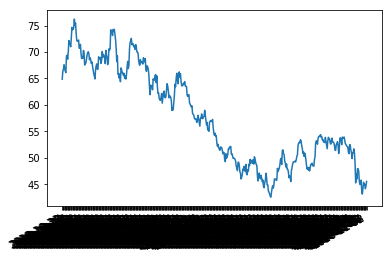

In [21]:
# Plot time serie/quick overview/no title & no axis
fig, ax = plt.subplots()
ax.plot(df['Dates'], df['Crude Oil stock price'])
fig.autofmt_xdate()
plt.show()

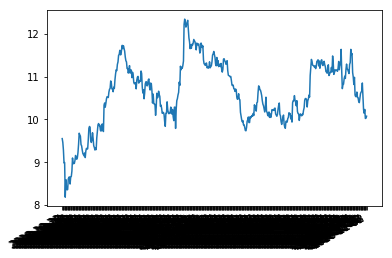

In [22]:
# Plot time serie/quick overview/no title & no axis
fig, ax = plt.subplots()
ax.plot(df['Dates'], df['Ford stock price'])
fig.autofmt_xdate()
plt.show()

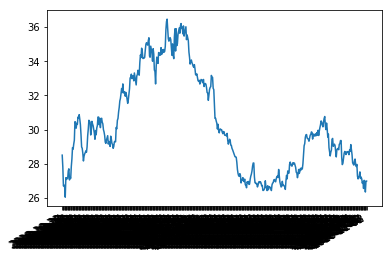

In [23]:
# Plot time serie/quick overview/no title & no axis
fig, ax = plt.subplots()
ax.plot(df['Dates'], df['Honda stock price'])
fig.autofmt_xdate()
plt.show()

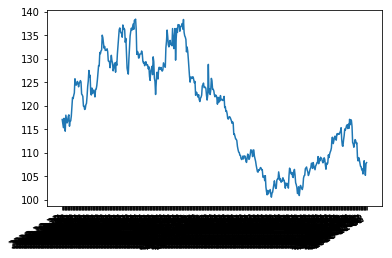

In [24]:
# Plot time serie/quick overview/no title & no axis
fig, ax = plt.subplots()
ax.plot(df['Dates'], df['Toyota stock price'])
fig.autofmt_xdate()
plt.show()

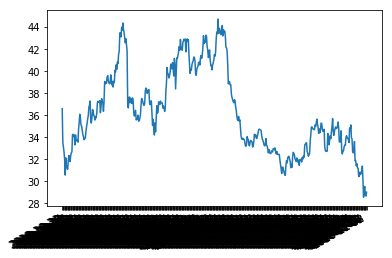

In [25]:
# Plot time serie/quick overview/no title & no axis
fig, ax = plt.subplots()
ax.plot(df['Dates'], df['GM stock price'])
fig.autofmt_xdate()
plt.show()

In [50]:
# Sort dataframe
freedom_df = df.sort_values("Dates")
freedom_df.head()

,Dates,Crude Oil stock price,Ford stock price,Honda stock price,Toyota stock price,GM stock price
502,2016-11-02,45.51,10.0735,26.9783,107.8723,29.0060
501,2016-11-03,44.66,10.0294,26.9879,107.6725,28.6555
500,2016-11-04,44.13,10.0205,26.3414,105.1893,28.7385
499,2016-11-07,44.95,10.2326,26.9118,107.0160,29.5317
498,2016-11-08,44.83,10.1442,27.0259,108.2814,29.2642


In [51]:
# Calculate the percentage return
price = freedom_df['Crude Oil stock price']
crude_return = price.pct_change(1)
crude_return.head()

502         NaN
501   -0.018677
500   -0.011867
499    0.018581
498   -0.002670
Name: Crude Oil stock price, dtype: float64

In [52]:
# Calculate the percentage return
price2 = freedom_df['Ford stock price']
ford_return = price2.pct_change(1)
ford_return.head()

502         NaN
501   -0.004378
500   -0.000887
499    0.021167
498   -0.008639
Name: Ford stock price, dtype: float64

In [53]:
# Calculate the percentage return
price3 = freedom_df['Honda stock price']
honda_return = price3.pct_change(1)
honda_return.head()

502         NaN
501    0.000356
500   -0.023955
499    0.021654
498    0.004240
Name: Honda stock price, dtype: float64

In [54]:
# Calculate the percentage return
price4 = freedom_df['Toyota stock price']
toyota_return = price4.pct_change(1)
toyota_return.head()

502         NaN
501   -0.001852
500   -0.023063
499    0.017366
498    0.011824
Name: Toyota stock price, dtype: float64

In [55]:
# Calculate the percentage return
price5 = freedom_df['GM stock price']
gm_return = price5.pct_change(1)
gm_return.head()

502         NaN
501   -0.012084
500    0.002896
499    0.027601
498   -0.009058
Name: GM stock price, dtype: float64

In [56]:
# Assign returns into a Dataframe
freedom_df['Crude Return']=crude_return
freedom_df['Ford Return']=ford_return
freedom_df['Honda Return']=honda_return
freedom_df['Toyota Return']=toyota_return
freedom_df['GM Return']=gm_return
freedom_df.head()

,Dates,Crude Oil stock price,Ford stock price,Honda stock price,Toyota stock price,GM stock price,Crude Return,Ford Return,Honda Return,Toyota Return,GM Return
502,2016-11-02,45.51,10.0735,26.9783,107.8723,29.0060,NaN,NaN,NaN,NaN,NaN
501,2016-11-03,44.66,10.0294,26.9879,107.6725,28.6555,-0.018677,-0.004378,0.000356,-0.001852,-0.012084
500,2016-11-04,44.13,10.0205,26.3414,105.1893,28.7385,-0.011867,-0.000887,-0.023955,-0.023063,0.002896
499,2016-11-07,44.95,10.2326,26.9118,107.0160,29.5317,0.018581,0.021167,0.021654,0.017366,0.027601
498,2016-11-08,44.83,10.1442,27.0259,108.2814,29.2642,-0.002670,-0.008639,0.004240,0.011824,-0.009058


In [57]:
# Clean data
freedom_df.dropna(inplace=True)
freedom_df

,Dates,Crude Oil stock price,Ford stock price,Honda stock price,Toyota stock price,GM stock price,Crude Return,Ford Return,Honda Return,Toyota Return,GM Return
501,2016-11-03,44.66,10.0294,26.9879,107.6725,28.6555,-0.018677,-0.004378,0.000356,-0.001852,-0.012084
500,2016-11-04,44.13,10.0205,26.3414,105.1893,28.7385,-0.011867,-0.000887,-0.023955,-0.023063,0.002896
499,2016-11-07,44.95,10.2326,26.9118,107.0160,29.5317,0.018581,0.021167,0.021654,0.017366,0.027601
498,2016-11-08,44.83,10.1442,27.0259,108.2814,29.2642,-0.002670,-0.008639,0.004240,0.011824,-0.009058
497,2016-11-09,45.34,10.2326,26.5506,106.3785,28.5541,0.011376,0.008714,-0.017587,-0.017574,-0.024265
496,2016-11-10,44.29,10.5507,26.9498,105.4747,30.1865,-0.023158,0.031087,0.015035,-0.008496,0.057169
495,2016-11-11,43.12,10.8511,26.8548,106.5117,31.3763,-0.026417,0.028472,-0.003525,0.009832,0.039415
494,2016-11-14,43.72,10.6567,27.1114,106.3500,30.6938,0.013915,-0.017915,0.009555,-0.001518,-0.021752
493,2016-11-15,45.75,10.6391,27.2160,107.0255,30.8321,0.046432,-0.001652,0.003858,0.006352,0.004506
492,2016-11-16,45.33,10.6037,27.1304,107.1016,30.6477,-0.009180,-0.003327,-0.003145,0.000711,-0.005981


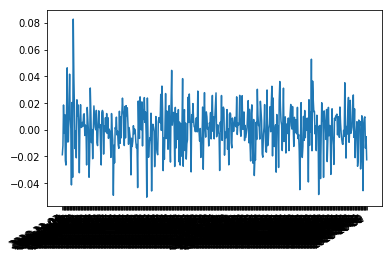

In [59]:
# Plot returns crude oil/quick overview/no title & no axis
fig, ax1 = plt.subplots()
ax1.plot(freedom_df['Dates'], freedom_df['Crude Return'])
fig.autofmt_xdate()
plt.show()

(array([  0.,   8.,  48., 167., 231.,  43.,   4.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

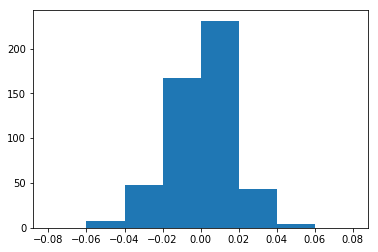

In [61]:
# Quick overview/no title & no axis/ histogram to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['Crude Return'], bins=auto, label="WTI")

(array([  1.,   5.,  21., 212., 235.,  25.,   2.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

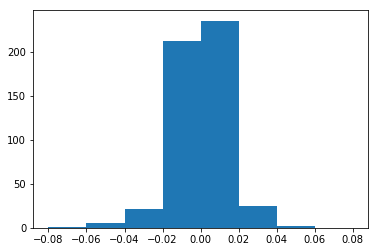

In [62]:
# Quick overview/no title & no axis/ histogram to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['Ford Return'], bins=auto, label="WTI")

(array([  0.,   1.,  15., 217., 250.,  18.,   1.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

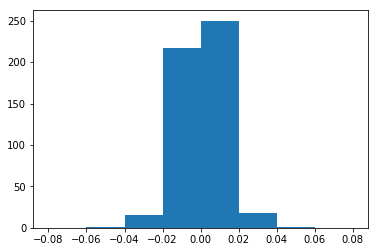

In [63]:
# Quick overview/no title & no axis/ histogram to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['Honda Return'], bins=auto, label="WTI")

(array([  0.,   1.,  11., 229., 243.,  15.,   3.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

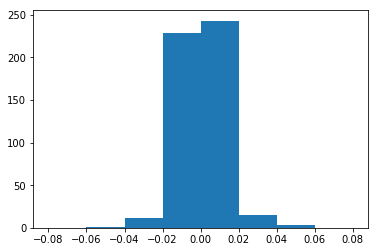

In [64]:
# Quick overview/no title & no axis/ histogram to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['Toyota Return'], bins=auto, label="WTI")

(array([  0.,   4.,  40., 185., 230.,  33.,   8.,   0.]),
 array([-0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08]),
 <a list of 8 Patch objects>)

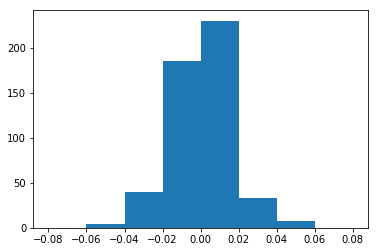

In [65]:
# Quick overview/no title & no axis/ histogram to see the distribution of the returns
fig, ax2 = plt.subplots()
auto = [-0.08,-0.06,-0.04,-0.02,0.00,0.02,0.04,0.06,0.08]
ax2.hist(freedom_df['GM Return'], bins=auto, label="WTI")